# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Шаги для выбора локации обычно такие:

    В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
    Строят модель для предсказания объёма запасов в новых скважинах;
    Выбирают скважины с самыми высокими оценками значений;
    Определяют регион с максимальной суммарной прибылью отобранных скважин.

Вам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.

Инструкция по выполнению проекта
    Загрузите и подготовьте данные. Поясните порядок действий.

Обучите и проверьте модель для каждого региона:

    2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
    2.2. Обучите модель и сделайте предсказания на валидационной выборке.
    2.3. Сохраните предсказания и правильные ответы на валидационной выборке.
    2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
    2.5. Проанализируйте результаты.

Подготовьтесь к расчёту прибыли:

    3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.
    3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе.
    3.3. Напишите выводы по этапу подготовки расчёта прибыли.

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:

    4.1. Выберите скважины с максимальными значениями предсказаний.
    4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
    4.3. Рассчитайте прибыль для полученного объёма сырья.

Посчитайте риски и прибыль для каждого региона:

    5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
    5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.



### Описание данных
Данные геологоразведки трёх регионов находятся в файлах:

    /datasets/geo_data_0.csv. Скачать датасет
    /datasets/geo_data_1.csv. Скачать датасет
    /datasets/geo_data_2.csv. Скачать датасет

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

Условия задачи:

    Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
    При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
    Бюджет на разработку скважин в регионе — 10 млрд рублей.
    При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
    После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score, precision_score,f1_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.utils import shuffle
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
geo_0  = pd.read_csv('/datasets/geo_data_0.csv')
geo_1  = pd.read_csv('/datasets/geo_data_1.csv')
geo_2  = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def explore_data(df):
    display(
        "Сводная информация:", df.info(),
        "10 строк:", df.head(10),
        "Столбцы:", df.columns,
        "Числовое описание:", df.describe(),
        "Сумма пропусков:", df.isna().sum(),
        "Доля пропусков:", df.isna().mean(),
        "Явные дубликаты:", df.duplicated().sum(),
        "Корреляция:", df.corr(),
        sns.heatmap(df.corr())
    )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


'Сводная информация:'

None

'10 строк:'

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


'Столбцы:'

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

'Числовое описание:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


'Сумма пропусков:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Доля пропусков:'

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


<AxesSubplot:>

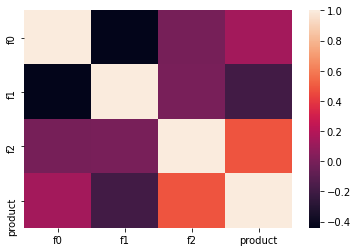

In [4]:
explore_data(geo_0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


'Сводная информация:'

None

'10 строк:'

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


'Столбцы:'

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

'Числовое описание:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


'Сумма пропусков:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Доля пропусков:'

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


<AxesSubplot:>

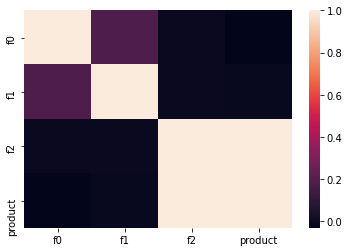

In [5]:
explore_data(geo_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


'Сводная информация:'

None

'10 строк:'

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


'Столбцы:'

Index(['id', 'f0', 'f1', 'f2', 'product'], dtype='object')

'Числовое описание:'

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


'Сумма пропусков:'

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

'Доля пропусков:'

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

'Явные дубликаты:'

0

'Корреляция:'

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


<AxesSubplot:>

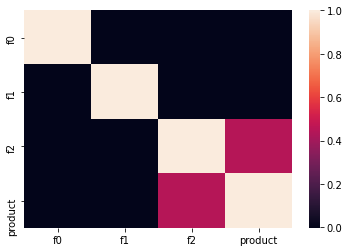

In [6]:
explore_data(geo_2)

Удаляем избыточный столбец **id** и делим набор на 2 части , тренировочный набор и тестовый

In [7]:
def prepr_data(df):
    features = df.drop(['id', 'product'], axis=1)
    target = df['product']
    return train_test_split(features, target, test_size=0.25, random_state=12345)
    

In [8]:
features_train_0, features_test_0, target_train_0, target_test_0 = prepr_data(geo_0)
print(features_train_0.shape, features_test_0.shape, target_train_0.shape,target_test_0.shape)
features_train_1, features_test_1, target_train_1, target_test_1 = prepr_data(geo_1)
features_train_2, features_test_2, target_train_2, target_test_2 = prepr_data(geo_2)

(75000, 3) (25000, 3) (75000,) (25000,)


### Вывод
* сильный корреляций не обнаружено, в основном значения близки к 0, только в нулевом регионе корреляция f1 и product почти 0.5
* Пропусков данных не обнаружено
* дубликаты не обнаружены
* Судя по значениям данные уже масштабированы

## Обучение и проверка модели

Фрейм для хранения результатов предсказания модели

In [9]:
geos_scores = pd.DataFrame( index=['mean','mse','rmse'])#columns=["geo_0","geo_1","geo_2"],
geos_scores

""
mean
mse
rmse


Обучаем модель и делаем предсказания

In [10]:

def get_predictions(df, model):
    features_train, features_test, target_train, target_test = prepr_data(df)
    model.fit(features_train, target_train)
    return pd.Series(model.predict(features_test)), target_test
    

In [11]:
df_dict = {'geo_0': geo_0 , 'geo_1': geo_1,'geo_2': geo_2}

Получаем результаты предсказаний

In [12]:

def get_scores(target, predictions): #df, model
    #predictions, target = get_predictions(df, model)
    mse = mean_squared_error(target, predictions) 
    rmse = mse** 0.5
    #print(predictions.mean(), mse, rmse)
    return pd.Series([predictions.mean(), mse, rmse], index=['mean','mse','rmse'])


In [13]:
model = LinearRegression()
region_predictions = []
region_targets = []
for column in df_dict:
    predictions, target_test = get_predictions(df_dict[column], model)
    geos_scores[column] = get_scores(predictions, target_test)
    region_predictions.append(predictions)
    region_targets.append(target_test)
    #print(get_scores(predictions, target_test))

In [14]:
print(len(region_predictions), len(region_targets))

3 3


### Вывод
Наименьшая среднеквадратичная ошибка выявлена у 1 региона

In [15]:
geos_scores

,geo_0,geo_1,geo_2
mean,92.078597,68.723136,94.884233
mse,1412.212936,0.797626,1602.377581
rmse,37.579422,0.893099,40.029709


## Подготовка к расчёту прибыли

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [16]:
explore_points_count = 500 # При разведке региона исследуют 500 точек
best_points_count = 200 # с помощью машинного обучения выбирают 200 лучших для разработки
buget = 10**10 # Бюджет на разработку скважин в регионе — 10 млрд рублей
revenue = 45*10**4 # Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
risk_treashold = 0.025 # После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%.
breakeven_point = round(buget/revenue/best_points_count, 2)

In [17]:
print("Точка безубыточности для новой скважины: ",breakeven_point)

Точка безубыточности для новой скважины:  111.11


## Расчёт прибыли и рисков 

In [18]:
def count_profit(region_prediction, region_target):
    top_200_predictions = region_prediction.sort_values(ascending=False).head(best_points_count)
    try:
        profit =  (region_target.iloc[top_200_predictions.index] - breakeven_point)*revenue
        #print("here1")
    except IndexError:
        profit =  (region_target.loc[top_200_predictions.index] - breakeven_point)*revenue
        #print("bootstrap function")
    return profit.sum()
        

In [33]:
region_profit = []
for i in range(len(region_targets)):
    region_profit.append(count_profit(region_predictions[i], region_targets[i]))
    print(f'Среднее предсказанное количество продукта в регионе {i}: {region_predictions[i].mean()}, реальное: {region_targets[i].mean()}')

Среднее предсказанное количество продукта в регионе 0: 92.59256778438035, реальное: 92.07859674082927
Среднее предсказанное количество продукта в регионе 1: 68.728546895446, реальное: 68.72313602435997
Среднее предсказанное количество продукта в регионе 2: 94.96504596800489, реальное: 94.88423280885438


In [39]:
for i in range(len(region_profit)):
    print(f'предсказанное значение дохода в регионе {i}: {round(region_profit[i])} рублей')
#region_profit

предсказанное значение дохода в регионе 0: 3320926043 рублей
предсказанное значение дохода в регионе 1: 2415186697 рублей
предсказанное значение дохода в регионе 2: 2710449964 рублей


In [55]:
total = pd.DataFrame( columns=['mean_profit','risk_percent'], index=["geo_0","geo_1","geo_2"])
def bootstrap(region_prediction, region_target, points):
    state = np.random.RandomState(12345)
    values = []
    
    for i in range(1000):
        target_subsample = region_target.reset_index(drop=True).sample(n=points, replace=True, random_state=state)
        pred_subsample = region_prediction[target_subsample.index]
        values.append(count_profit(pred_subsample, target_subsample)) #subsample.quantile(0.99))
    
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(.025)
    upper = values.quantile(.975)
    risk = (values<0).mean()*100
    print(f'Средняя выручка: {mean}')
    print(f'Доверительный интервал: {lower, upper}')
    print(f'Риск убытка: {risk} %')
    return mean, risk

### Вывод

In [57]:
total['mean_profit'][0], total['risk_percent'][0] = bootstrap(region_predictions[0], region_targets[0], explore_points_count)

Средняя выручка: 403637216.2611653
Доверительный интервал: (-118225387.1231114, 931678317.5508474)
Риск убытка: 7.6 %


In [59]:
total['mean_profit'][1], total['risk_percent'][1] = bootstrap(region_predictions[1], region_targets[1], explore_points_count)

Средняя выручка: 465143060.22107255
Доверительный интервал: (32139692.85001978, 864490413.3254703)
Риск убытка: 1.7000000000000002 %


In [60]:
total['mean_profit'][2], total['risk_percent'][2] = bootstrap(region_predictions[2], region_targets[2], explore_points_count)

Средняя выручка: 414311736.3409678
Доверительный интервал: (-148271873.6824918, 972440192.9202838)
Риск убытка: 7.9 %


<AxesSubplot:title={'center':'Выручка регионов'}, ylabel='млн'>

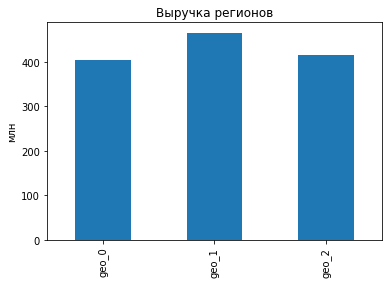

In [69]:
(total['mean_profit']/1000000).plot(kind='bar', title ='Выручка регионов', ylabel='млн')

<AxesSubplot:title={'center':'Риски регионов'}, ylabel='%'>

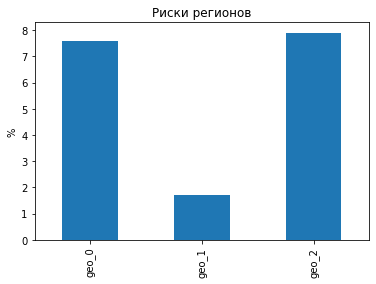

In [71]:
(total['risk_percent']).plot(kind='bar', title ='Риски регионов', ylabel='%')

Исходя из полученных результатов наиболее благоприятным для ведения бизнеса является первый регион, который обладает наибольшей средней выручкой и наименьшими рисками